**Presentation**

---



In this Notebook, I will create a basic IMDB Movies Recommender System using users ratings.

The purpose of this system is to give us 4 movie recommendations by giving them a single movie name. This number can be smaller or larger depending on our needs. This system can be used by a movie streaming site that has a user space.

**Recommendation systems**

---

Recommender systems are a broad class of web applications that involve predicting user responses to options. These systems can be classified into two broad groups:

* Content-Based Systems : Examine the properties of recommended items. For example, if you have watched a lot of cowboy movies on Netflix, 
then Netflix will always recommend a movie to you that is classified as a cowboy genre.

* Collaborative filtering systems : 
Here the recommend items are based on measures of similarity between users and/or items. 
Items that are recommended to a user are those items that are preferred by similar users.

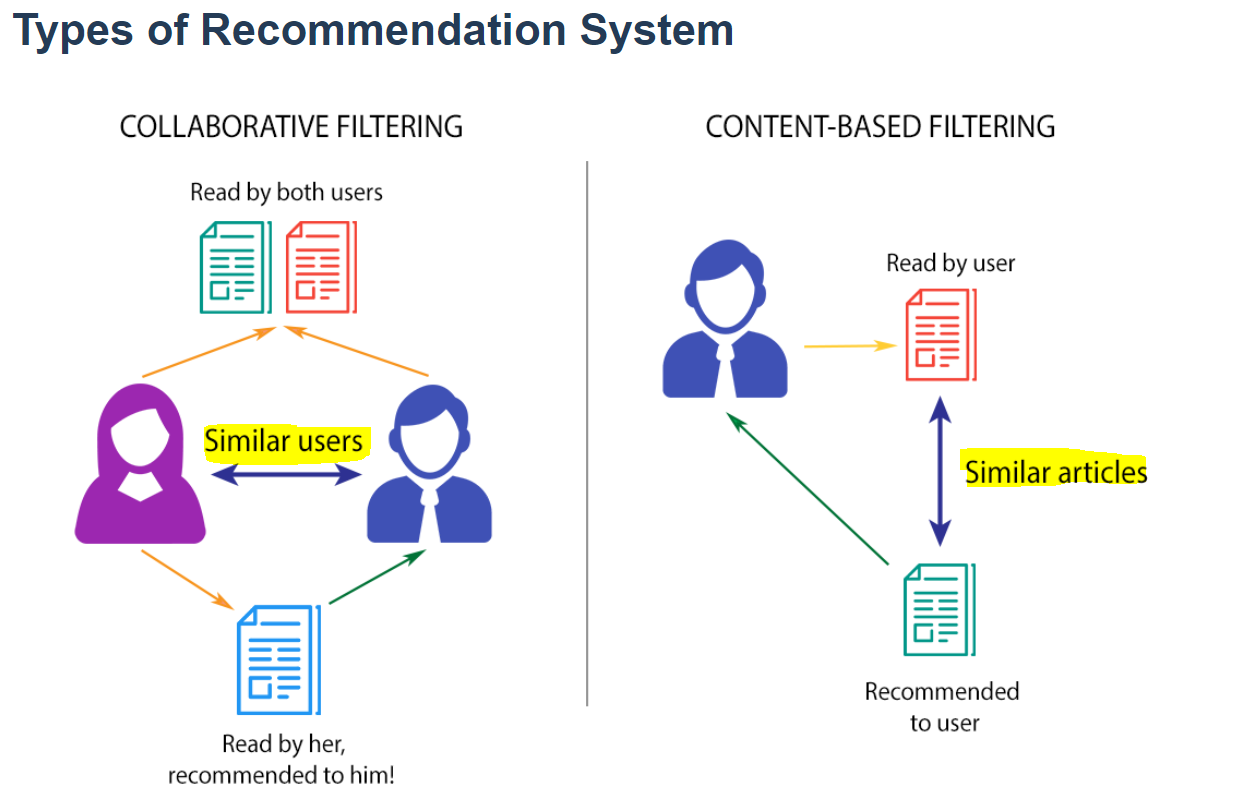

In our project, we will build the first type of these systems.

# **Main**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
users_ratings = pd.read_csv('/content/Movies_users_rating.csv', sep = '\t', names = column_names)
users_ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
#Get the Movie Titles
movie_titles = pd.read_csv('/content/Movies_titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
users_ratings = pd.merge(users_ratings, movie_titles, on = 'item_id')
users_ratings.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


* **Exploratory Data Analysis**

In [5]:
users_ratings.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [6]:
users_ratings.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [7]:
ratings = pd.DataFrame(users_ratings.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [8]:
ratings['numOfRatings'] = pd.DataFrame(users_ratings.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


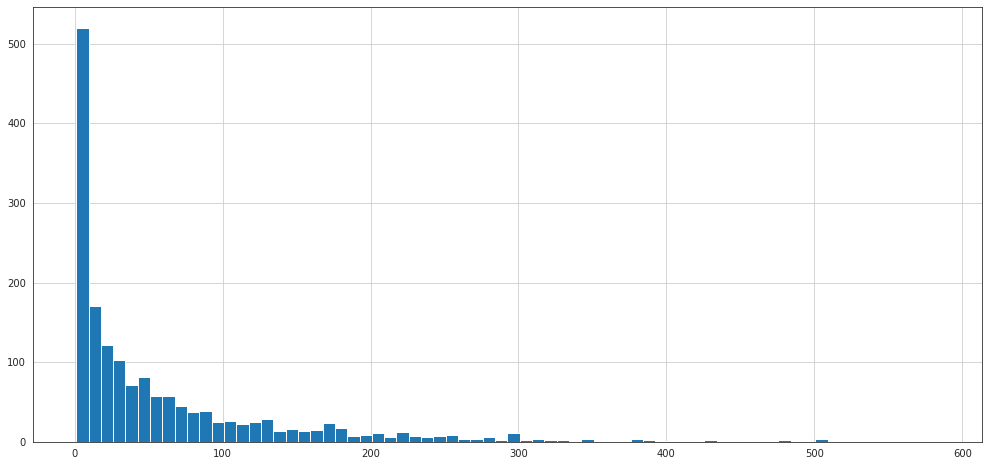

In [11]:
plt.figure(figsize = (17,8))
ratings['numOfRatings'].hist(bins = 70)

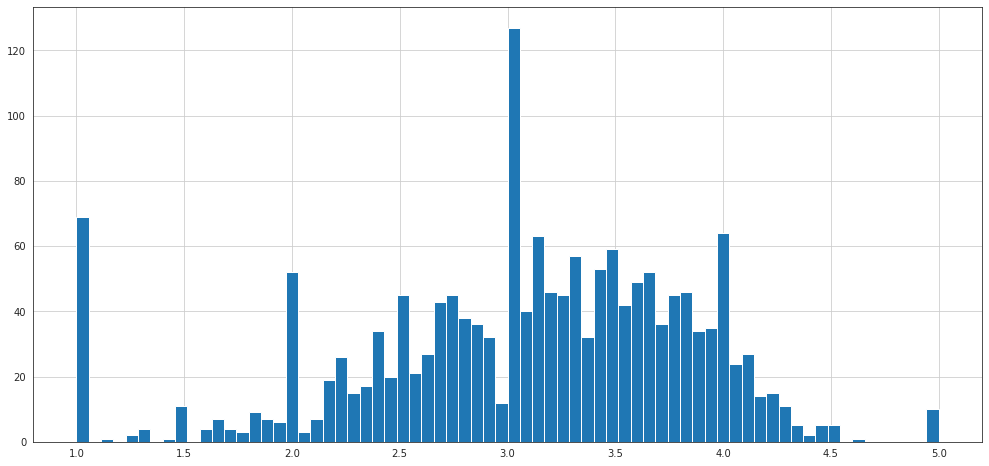

In [13]:
plt.figure(figsize = (17,8))
ratings['rating'].hist(bins = 70)

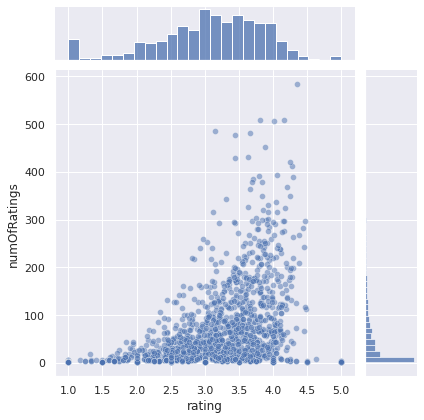

In [16]:
sns.set(rc={'figure.figsize':(18,7)})
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)

* **Create the Recommendation System**

Create a matrix with the user IDs on a row axis and the movie title on the column axis. Each cell will then consist of the rating the user gave to that movie. Note that there will be a lot of NaN values, which means that the user has not seen/rated this movie.

In [17]:
moviemat = users_ratings.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Most Rated Movies with their Average Ratings

In [18]:
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


++ We will now create a correlation matrix of each movie with all other movies on the user ratings. We will then use this correlation matrix to find the best matches for a particular movie (with at least 100 ratings) and the result (recommended movies) will then be added to the ratings data frame of each movie. The results (recommended films) will then be added to the ratings data frame for each film. Those whose matches could not be obtained using correlation, their value will be converted to "+-*/".

In [19]:
for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['numOfRatings'].count() >= 5:
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]    

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


* **Results**

In [20]:
 ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'Til There Was You (1997),2.333333,9,"Edge, The (1997)",William Shakespeare's Romeo and Juliet (1996),Star Trek: The Wrath of Khan (1982),Dumbo (1941)
1-900 (1994),2.600000,5,"Full Monty, The (1997)","Crow, The (1994)","Ice Storm, The (1997)",Hoop Dreams (1994)
101 Dalmatians (1996),2.908257,109,Murder at 1600 (1997),Miracle on 34th Street (1994),Being There (1979),"Remains of the Day, The (1993)"
12 Angry Men (1957),4.344000,125,Ulee's Gold (1997),Rear Window (1954),Seven Years in Tibet (1997),Clerks (1994)
187 (1997),3.024390,41,Maverick (1994),Conan the Barbarian (1981),"Magnificent Seven, The (1954)",Cool Hand Luke (1967)


In [21]:
ratings = ratings.fillna('+-*/')

In [26]:
def getRecommendations(movie_name):
    list_result = ratings[ratings.index == movie_name]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie << ' + movie_name + ' >> are:\n')
    print(finalRecommendationText)

* **Get Recommendations**

-Select and Copy any movie from the list of Movie Names above.

-Add that to the text box below.

==> You will have your Movie Recommendation for that Particular movie :)

++Note: Each time it is executed, the paste command will continue to add the current output. To clear the output, simply execute the cell below again.

In [27]:
#Test 1 
getRecommendations('Star Wars (1977)')

Your Recommendations for the Movie << Star Wars (1977) >> are:

1:Empire Strikes Back, The (1980) 
2:Return of the Jedi (1983) 
3:Raiders of the Lost Ark (1981) 
4:Austin Powers: International Man of Mystery (1997)


In [28]:
#Test 2 
getRecommendations('12 Angry Men (1957)')

Your Recommendations for the Movie << 12 Angry Men (1957) >> are:

1:Ulee's Gold (1997) 
2:Rear Window (1954) 
3:Seven Years in Tibet (1997) 
4:Clerks (1994)


* Conclusion

---



-Our recommendation system works very well and is ready to be used on the movie streaming site we extracted the data from.